In [1]:
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install mdatagen
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install numpy scipy sklearn
!pip install jax
!pip install chex
!pip install attr
!pip install optax



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys
sys.path.append(r"C:\Users\zhossai3\Desktop\Fair_Imputation") 


import Utils
import CMI
import Inject_Missing_Values
import RR_imputer
import Sinkhorn_CMI
import SinkhornImputation
import SoftImpute



c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


In [3]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from geomloss import SamplesLoss

from sklearn.preprocessing import scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

from Utils import *
from SoftImpute import softimpute, cv_softimpute
from SinkhornImputation import SinkhornImputation
from Sinkhorn_CMI import *
from RR_imputer import RRimputer
import matplotlib.pyplot as plt
from CMI import *

from Inject_Missing_Values import *

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")
import pandas as pd

torch.set_default_tensor_type('torch.DoubleTensor')

**Load Data**

In [4]:
import pandas as pd

# Read CSV file into a Pandas DataFrame
groundTruth = pd.read_csv(r'C:\Users\zhossai3\Desktop\Fair_Imputation\Data\German Credit\German_Credit_Ground_Truth.csv', delimiter=',', header=0)

# Store feature columns in a DataFrame


X= groundTruth.iloc[:, :-1]  # Selects all rows and all columns except the last one
Y = groundTruth.iloc[:, -1]  # Selects all rows and only the last column


In [5]:
groundTruth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   checking-account                       1000 non-null   int64
 1   duration                               1000 non-null   int64
 2   credit-history                         1000 non-null   int64
 3   purpose                                1000 non-null   int64
 4   credit-amount                          1000 non-null   int64
 5   savings-account                        1000 non-null   int64
 6   employment-since                       1000 non-null   int64
 7   installment-rate                       1000 non-null   int64
 8   other-debtors                          1000 non-null   int64
 9   residence-since                        1000 non-null   int64
 10  property                               1000 non-null   int64
 11  age                            

Checking Number of unique values

In [6]:
groundTruth.nunique()

checking-account                           4
duration                                  33
credit-history                             5
purpose                                   10
credit-amount                            921
savings-account                            5
employment-since                           5
installment-rate                           4
other-debtors                              3
residence-since                            4
property                                   4
age                                       53
other-installment                          3
housing                                    3
existing-credits                           4
job                                        4
number-people-provide-maintenance-for      2
telephone                                  2
foreign-worker                             2
sex                                        2
marital-status                             2
class-label                                2
dtype: int

In [7]:
groundTruth_tensor = torch.tensor(scale(groundTruth)) #converting groundTruth to Tensor, z-score scaling

In [8]:
print("minimum: ",groundTruth_tensor.min())
print("maximum:",groundTruth_tensor.max())
print("mean: ",groundTruth_tensor.mean())
print("median: ", groundTruth_tensor.median())

minimum:  tensor(-5.1017)
maximum: tensor(5.3708)
mean:  tensor(1.2919e-18)
median:  tensor(-0.0222)


Determining the appropriate columns for bucketization along with their respective bucket sizes, and identifying the variables X, Y, and Z for Conditional Mutual Information (CMI) computation.

In [67]:
bucket_specs = {
     
    11: 4,   # Column 11 → age (4 bins)
    19: 2,  # Column 19 → sex (2 bins)
    21: 2,  # Column 21 → label  (2 bins)
    5: 5,   # Column 5 → savings-account (5 bins)
    15: 4,   # Column 15 → jobs (4 bins)
    0: 4, #column 0 -> checking-account (4 bins)
    3: 10, #column 3 -> purpose (10 bins)
    1: 5,  #column 1 -> duration (5 bins)
    2: 5, #column 2 -> credit history (5 bins)
    6: 5, #employment-since
    
}

# Define multiple attributes for X, Y, Z
X_cols = [11,19]  # Bucketized sensitive attributes (e.g., sex, race, age)
Y_cols = [21]     # Bucketized outcome-related attributes
Z_cols = [2,5,6,15]  
#Z_cols = [2, 5, 6, 10, 13, 14]

**CMI for GroundTruth**

In [68]:
cmi_groundTruth = CMI.conditional_mutual_information(groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_groundTruth)

0.21896948268029517


Generating MCAR 25%, and added the target coloumn with the 25% missing MCAR data

In [11]:
generator_mcar25 = Inject_Missing_Values()
miss_mcar25,index_mcar25 = generator_mcar25.MCAR(X,missing_rate=25)
type(miss_mcar25)
total_missing_percentage_mar25= miss_mcar25.isnull().sum().sum() / miss_mcar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mar25:.2f}%")

missing_percentage = (miss_mcar25.isnull().sum() / len(miss_mcar25)) * 100
print(missing_percentage)

miss_mcar25 = pd.concat([miss_mcar25, Y], axis=1) #adding the target coloumn

Total Missing Percentage MAR25: 25.00%
checking-account                         23.2
duration                                 23.5
credit-history                           25.6
purpose                                  24.3
credit-amount                            24.1
savings-account                          26.6
employment-since                         26.0
installment-rate                         23.3
other-debtors                            23.3
residence-since                          24.5
property                                 25.2
age                                      25.7
other-installment                        24.3
housing                                  26.0
existing-credits                         25.4
job                                      25.9
number-people-provide-maintenance-for    26.4
telephone                                25.8
foreign-worker                           24.7
sex                                      24.7
marital-status                           

In [12]:
miss_mcar25_numpy = scale(miss_mcar25) #z-score scaling
miss_mcar25_tensor = torch.tensor(miss_mcar25_numpy) #converting to tensor

Applying Sinkhorn algorithm to MCAR 25% data

In [13]:
#only Sinkhorn
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
print(epsilon_mcar25)
mask_mcar25 = torch.isnan(miss_mcar25_tensor).double()


on_sk_imputer_mcar25 = SinkhornImputation(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mcar25, on_sk_maes25mcar, on_sk_rmses25mcar = on_sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mcar25_numpy = on_sk_imp_mcar25.detach().cpu().numpy()
on_sk_mae_mcar25 = MAE(on_sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
on_sk_rmse_mcar25 = RMSE(on_sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print(on_sk_mae_mcar25,on_sk_rmse_mcar25)

0.7869789295671578


INFO:root:batchsize = 128, epsilon = 0.7870
INFO:root:Iteration 0:	 Loss: 5.7329	 Validation MAE: 0.7781	RMSE: 1.0028
INFO:root:Iteration 50:	 Loss: 5.5306	 Validation MAE: 0.7061	RMSE: 0.9852
INFO:root:Iteration 100:	 Loss: 5.6637	 Validation MAE: 0.6926	RMSE: 0.9770
INFO:root:Iteration 150:	 Loss: 5.5542	 Validation MAE: 0.6856	RMSE: 0.9740
INFO:root:Iteration 200:	 Loss: 5.5162	 Validation MAE: 0.6812	RMSE: 0.9710
INFO:root:Iteration 250:	 Loss: 5.6637	 Validation MAE: 0.6779	RMSE: 0.9682
INFO:root:Iteration 300:	 Loss: 5.3092	 Validation MAE: 0.6755	RMSE: 0.9663
INFO:root:Iteration 350:	 Loss: 5.8491	 Validation MAE: 0.6740	RMSE: 0.9666
INFO:root:Iteration 400:	 Loss: 6.1405	 Validation MAE: 0.6717	RMSE: 0.9646
INFO:root:Iteration 450:	 Loss: 5.8160	 Validation MAE: 0.6709	RMSE: 0.9635
INFO:root:Iteration 500:	 Loss: 5.3572	 Validation MAE: 0.6705	RMSE: 0.9632
INFO:root:Iteration 550:	 Loss: 5.5346	 Validation MAE: 0.6711	RMSE: 0.9643
INFO:root:Iteration 600:	 Loss: 5.6133	 Validat

tensor(0.6687, grad_fn=<DivBackward0>) tensor(0.9640, grad_fn=<SqrtBackward0>)


Calculating CMI after applying the Sinkhorn Imputation (only Sinkhorn algorithm)

In [14]:
#only CMI
on_cmi_missmcar25 = CMI.conditional_mutual_information(on_sk_imp_mcar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmcar25)
print(on_sk_mae_mcar25,on_sk_rmse_mcar25)

0.18641951111200036
tensor(0.6687, grad_fn=<DivBackward0>) tensor(0.9640, grad_fn=<SqrtBackward0>)


Applying Sinkhorn-CMI algorithm to MCAR 25%

In [15]:
#sinkhorn_CMI
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mcar25)
mask_mcar25  = torch.isnan(miss_mcar25_tensor).double()


sk_imputer_mcar25 = SinkhornImputation_CMI(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar25, sk_maes25mcar, sk_rmses25mcar,cmi_loss_mcar25,sinkhorn_loss_mcar25 = sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mcar25_numpy = sk_imp_mcar25.detach().cpu().numpy()

sk_mae_mcar25 = MAE(sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
sk_rmse_mcar25 = RMSE(sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print(sk_mae_mcar25,sk_rmse_mcar25)





0.7869789295671578


INFO:root:Iteration 0:	 Loss: 5.4553	 Validation MAE: 0.7795	RMSE: 1.0045
INFO:root:Iteration 50:	 Loss: 41.5801	 Validation MAE: 0.7068	RMSE: 0.9833
INFO:root:Iteration 100:	 Loss: 42.1468	 Validation MAE: 0.6922	RMSE: 0.9749
INFO:root:Iteration 150:	 Loss: 41.5830	 Validation MAE: 0.6855	RMSE: 0.9706
INFO:root:Iteration 200:	 Loss: 41.5242	 Validation MAE: 0.6808	RMSE: 0.9684
INFO:root:Iteration 250:	 Loss: 38.6208	 Validation MAE: 0.6781	RMSE: 0.9663
INFO:root:Iteration 300:	 Loss: 40.4773	 Validation MAE: 0.6763	RMSE: 0.9656
INFO:root:Iteration 350:	 Loss: 39.8838	 Validation MAE: 0.6746	RMSE: 0.9646
INFO:root:Iteration 400:	 Loss: 42.8342	 Validation MAE: 0.6737	RMSE: 0.9636
INFO:root:Iteration 450:	 Loss: 43.5404	 Validation MAE: 0.6727	RMSE: 0.9632
INFO:root:Iteration 500:	 Loss: 43.9447	 Validation MAE: 0.6708	RMSE: 0.9614
INFO:root:Iteration 550:	 Loss: 45.1531	 Validation MAE: 0.6699	RMSE: 0.9613
INFO:root:Iteration 600:	 Loss: 42.1862	 Validation MAE: 0.6689	RMSE: 0.9613
INF

tensor(0.6691, grad_fn=<DivBackward0>) tensor(0.9635, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn_CMI Imputation

In [16]:
#CMI
cmi_mcar25 = CMI.conditional_mutual_information(sk_imp_mcar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mcar25)
print(sk_mae_mcar25)

0.17437246836207543
tensor(0.6691, grad_fn=<DivBackward0>)


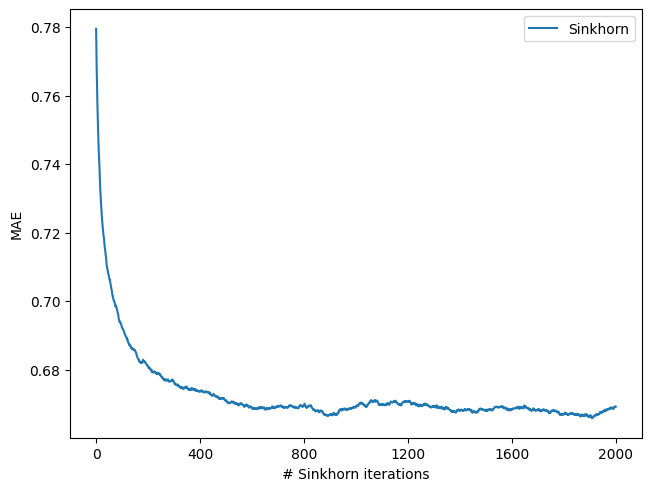

In [17]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes25mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes25mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')
ax.set_ylabel('MAE')
plt.legend()
plt.show()

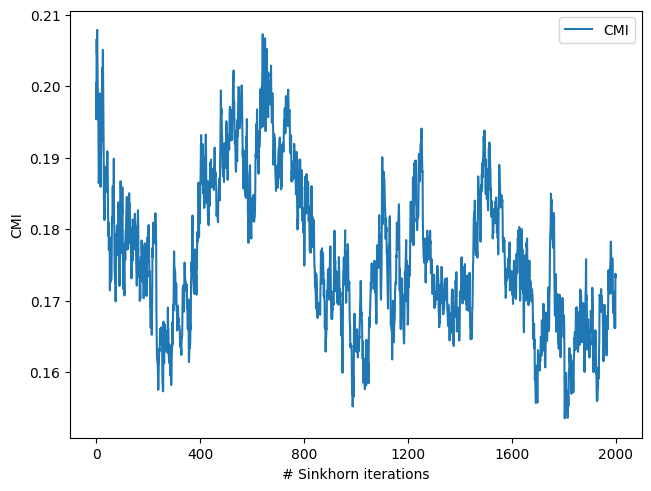

In [18]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(cmi_loss_mcar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, cmi_loss_mcar25, label='CMI')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('CMI')
plt.legend()
plt.show()

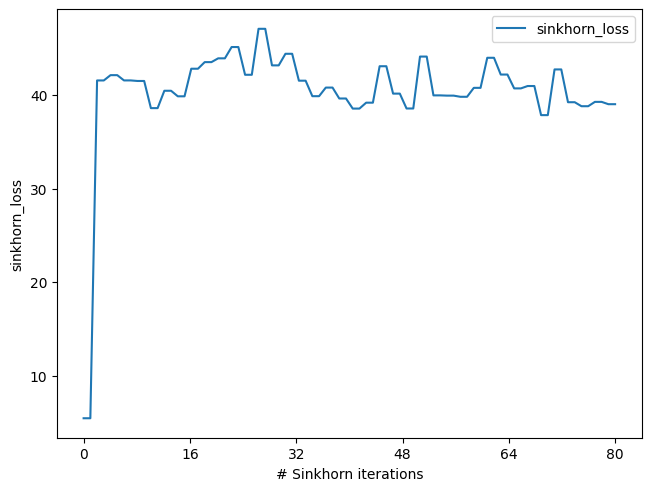

In [19]:
sinkhorn_loss_mcar25 = torch.tensor(sinkhorn_loss_mcar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mcar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mcar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

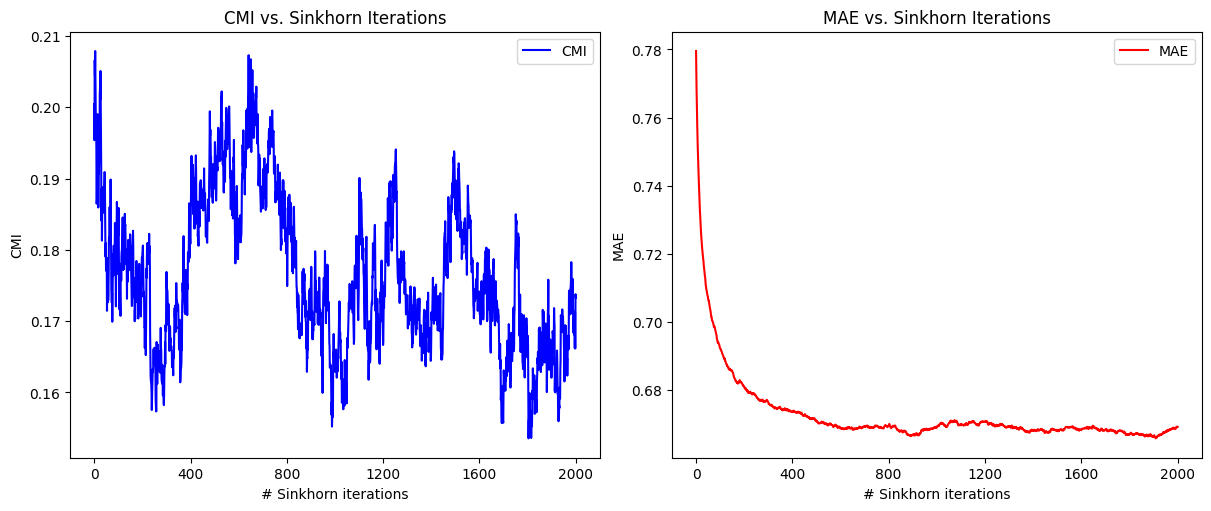

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss_mcar25)  # Length of CMI data
npoints_mae = len(sk_maes25mcar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss_mcar25, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes25mcar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()


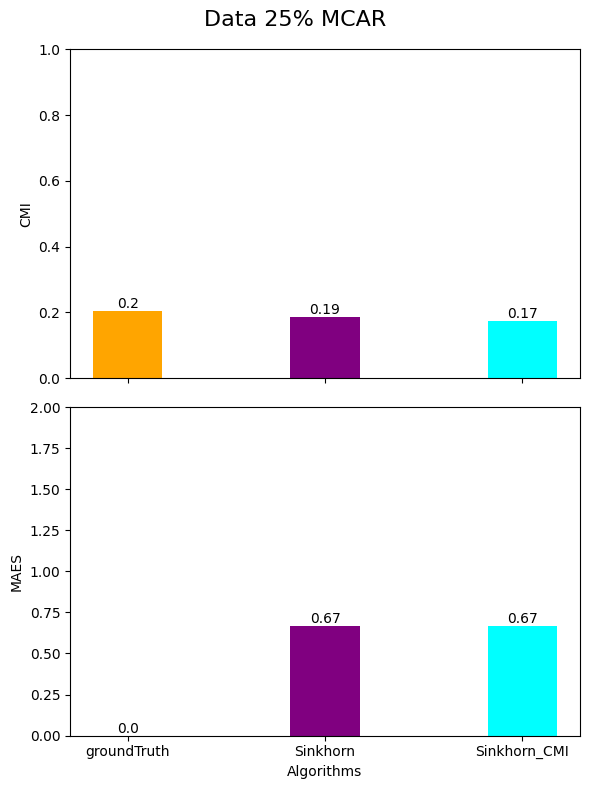

In [21]:

# Define values and categories
values_cmi_mcar25 = [cmi_groundTruth,on_cmi_missmcar25,cmi_mcar25]
values_maes_mcar25 = [0.0,on_sk_mae_mcar25.detach(),sk_mae_mcar25.detach()]
categories = ["groundTruth","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange', 'purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MCAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mcar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mcar25, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


**25% MAR**

In [22]:
dependencies_mar25 = {"savings-account": {
        "influencers": ["age"],
        "condition": lambda row:  True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"]<=25 else 0.2 
    },
    "checking-account": {
        "influencers": ["age"],
        "condition": lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"]<=25 else 0.2 
    },
    "credit-amount": {
        "influencers": ["age"],
        "condition":  lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"]<=25 else 0.2 
    },
    "employment-since": {
        "influencers": ["sex"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["sex"]==1 else 0.1
    },
    "duration": {
        "influencers": ["sex"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["sex"]==1 else 0.2 
    },
    
    "job": {
        "influencers": ["employment-since"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["employment-since"]<2 else 0.2 
    },

    "purpose": {
        "influencers": ["age"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"]<=25 else 0.2 
    },

    "other-installment": {
        "influencers": ["credit-history"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["credit-history"]<2 else 0.2 
    },

     "housing": {
        "influencers": ["residence-since"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["residence-since"]<3 else 0.2 
    },
     "other-debtors": {
        "influencers": ["property"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["property"]<2 else 0.2 
    },

     "foreign-worker": {
        "influencers": ["telephone"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["telephone"]==1 else 0.2 
    },
     "number-people-provide-maintenance-for": {
        "influencers": ["marital-status"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["marital-status"]==1 else 0.2 
    }



}

Generating MAR 25%, and added the target coloumn with the 25% missing MAR data

In [23]:
generator_mar25 = Inject_Missing_Values()
miss_mar25,index_mar25 = generator_mar25.MAR(X,dependencies_mar25,missing_rate=25)
miss_mar25 = pd.concat([miss_mar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mar25 = miss_mar25.isnull().sum().sum() / miss_mar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mar25:.2f}%")

Total Missing Percentage MAR25: 23.86%


In [24]:
missing_percentage = (miss_mar25.isnull().sum() / len(miss_mar25)) * 100
print(missing_percentage)

checking-account                         40.0
duration                                 52.3
credit-history                            0.0
purpose                                  36.9
credit-amount                            37.6
savings-account                          38.0
employment-since                         48.1
installment-rate                          0.0
other-debtors                            47.4
residence-since                           0.0
property                                  0.0
age                                       0.0
other-installment                        57.9
housing                                  43.2
existing-credits                          0.0
job                                      44.9
number-people-provide-maintenance-for    36.5
telephone                                 0.0
foreign-worker                           42.2
sex                                       0.0
marital-status                            0.0
class-label                       

In [25]:
miss_mar25_numpy = scale(miss_mar25) #z-score scaling
miss_mar25_tensor = torch.tensor(miss_mar25_numpy) #converting to tensor

In [26]:
print(miss_mar25)

     checking-account  duration  credit-history  purpose  credit-amount  \
0                 1.0       NaN               0      7.0         1169.0   
1                 NaN      48.0               1      7.0            NaN   
2                 NaN      12.0               0      NaN            NaN   
3                 NaN      42.0               1      5.0         7882.0   
4                 1.0       NaN               2      NaN         4870.0   
..                ...       ...             ...      ...            ...   
995               3.0       NaN               1      5.0            NaN   
996               1.0       NaN               1      2.0         3857.0   
997               3.0       NaN               1      7.0          804.0   
998               NaN      45.0               1      7.0            NaN   
999               0.0      45.0               0      2.0         4576.0   

     savings-account  employment-since  installment-rate  other-debtors  \
0                NaN    

Applying Sinkhorn algorithm to MAR 25% data

In [27]:
#only Sinkhorn
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
print(epsilon_mar25)
mask_mar25= torch.isnan(miss_mar25_tensor).double()


on_sk_imputer_mar25 = SinkhornImputation(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mar25, on_sk_maes25mar, on_sk_rmses25mar = on_sk_imputer_mar25.fit_transform(miss_mar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mar25_numpy = on_sk_imp_mar25.detach().cpu().numpy()
on_sk_mae_mar25 = MAE(on_sk_imp_mar25,groundTruth_tensor , mask_mar25)
on_sk_rmse_mar25 = RMSE(on_sk_imp_mar25, groundTruth_tensor, mask_mar25)
print(on_sk_mae_mar25,on_sk_rmse_mar25)

INFO:root:batchsize = 128, epsilon = 0.7914


0.7914089195935361


INFO:root:Iteration 0:	 Loss: 5.4770	 Validation MAE: 0.7227	RMSE: 1.0042
INFO:root:Iteration 50:	 Loss: 5.3047	 Validation MAE: 0.6555	RMSE: 0.9887
INFO:root:Iteration 100:	 Loss: 5.0521	 Validation MAE: 0.6448	RMSE: 0.9830
INFO:root:Iteration 150:	 Loss: 5.3088	 Validation MAE: 0.6413	RMSE: 0.9794
INFO:root:Iteration 200:	 Loss: 5.4243	 Validation MAE: 0.6402	RMSE: 0.9789
INFO:root:Iteration 250:	 Loss: 5.2950	 Validation MAE: 0.6386	RMSE: 0.9765
INFO:root:Iteration 300:	 Loss: 5.6817	 Validation MAE: 0.6381	RMSE: 0.9757
INFO:root:Iteration 350:	 Loss: 5.0795	 Validation MAE: 0.6368	RMSE: 0.9748
INFO:root:Iteration 400:	 Loss: 5.4458	 Validation MAE: 0.6371	RMSE: 0.9750
INFO:root:Iteration 450:	 Loss: 5.2152	 Validation MAE: 0.6371	RMSE: 0.9751
INFO:root:Iteration 500:	 Loss: 4.8894	 Validation MAE: 0.6367	RMSE: 0.9756
INFO:root:Iteration 550:	 Loss: 5.2199	 Validation MAE: 0.6348	RMSE: 0.9750
INFO:root:Iteration 600:	 Loss: 4.9508	 Validation MAE: 0.6352	RMSE: 0.9741
INFO:root:Itera

tensor(0.6356, grad_fn=<DivBackward0>) tensor(0.9703, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn Imputation

In [28]:
#only CMI
on_cmi_missmar25 = CMI.conditional_mutual_information(on_sk_imp_mar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmar25)
print(on_sk_mae_mar25)

0.1783481382293862
tensor(0.6356, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MAR 25% data

In [29]:
#sinkhorn_CMI
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mar25)
mask_mar25 = torch.isnan(miss_mar25_tensor).double()


sk_imputer_mar25 = SinkhornImputation_CMI(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mar25, sk_maes25mar, sk_rmses25mar,cmi_loss_mar25,sinkhorn_loss_mar25 = sk_imputer_mar25.fit_transform(miss_mar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mar25_numpy = sk_imp_mar25.detach().cpu().numpy()

sk_mae_mar25 = MAE(sk_imp_mar25,groundTruth_tensor , mask_mar25)
sk_rmse_mar25 = RMSE(sk_imp_mar25, groundTruth_tensor, mask_mar25)
print(sk_mae_mar25,sk_rmse_mar25)


0.7914089195935361


INFO:root:Iteration 0:	 Loss: 5.1724	 Validation MAE: 0.7223	RMSE: 1.0073
INFO:root:Iteration 50:	 Loss: 41.9240	 Validation MAE: 0.6565	RMSE: 0.9910
INFO:root:Iteration 100:	 Loss: 39.5222	 Validation MAE: 0.6461	RMSE: 0.9844
INFO:root:Iteration 150:	 Loss: 36.9939	 Validation MAE: 0.6433	RMSE: 0.9825
INFO:root:Iteration 200:	 Loss: 40.2660	 Validation MAE: 0.6409	RMSE: 0.9807
INFO:root:Iteration 250:	 Loss: 36.7305	 Validation MAE: 0.6391	RMSE: 0.9781
INFO:root:Iteration 300:	 Loss: 36.0197	 Validation MAE: 0.6390	RMSE: 0.9776
INFO:root:Iteration 350:	 Loss: 35.9837	 Validation MAE: 0.6372	RMSE: 0.9763
INFO:root:Iteration 400:	 Loss: 39.5004	 Validation MAE: 0.6376	RMSE: 0.9761
INFO:root:Iteration 450:	 Loss: 37.1355	 Validation MAE: 0.6377	RMSE: 0.9764
INFO:root:Iteration 500:	 Loss: 38.9535	 Validation MAE: 0.6375	RMSE: 0.9764
INFO:root:Iteration 550:	 Loss: 39.2777	 Validation MAE: 0.6356	RMSE: 0.9761
INFO:root:Iteration 600:	 Loss: 41.8167	 Validation MAE: 0.6354	RMSE: 0.9747
INF

tensor(0.6360, grad_fn=<DivBackward0>) tensor(0.9705, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn_CMI Imputation

In [30]:
#CMI
cmi_mar25 = CMI.conditional_mutual_information(sk_imp_mar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mar25)
print(sk_mae_mar25,sk_rmse_mar25)

0.17955728869178048
tensor(0.6360, grad_fn=<DivBackward0>) tensor(0.9705, grad_fn=<SqrtBackward0>)


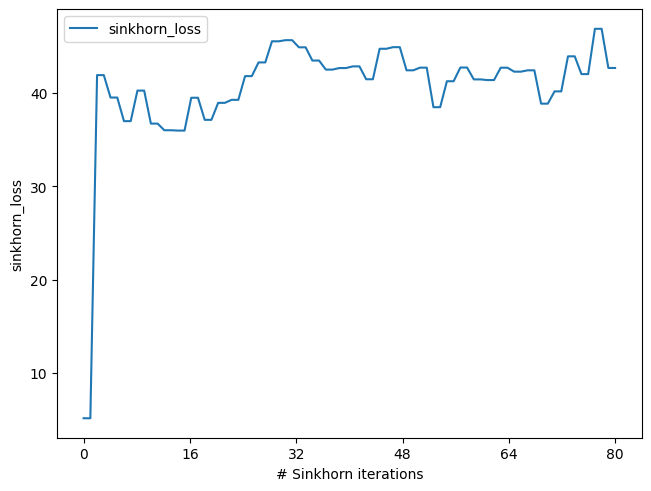

In [31]:
sinkhorn_loss_mar25 = torch.tensor(sinkhorn_loss_mar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

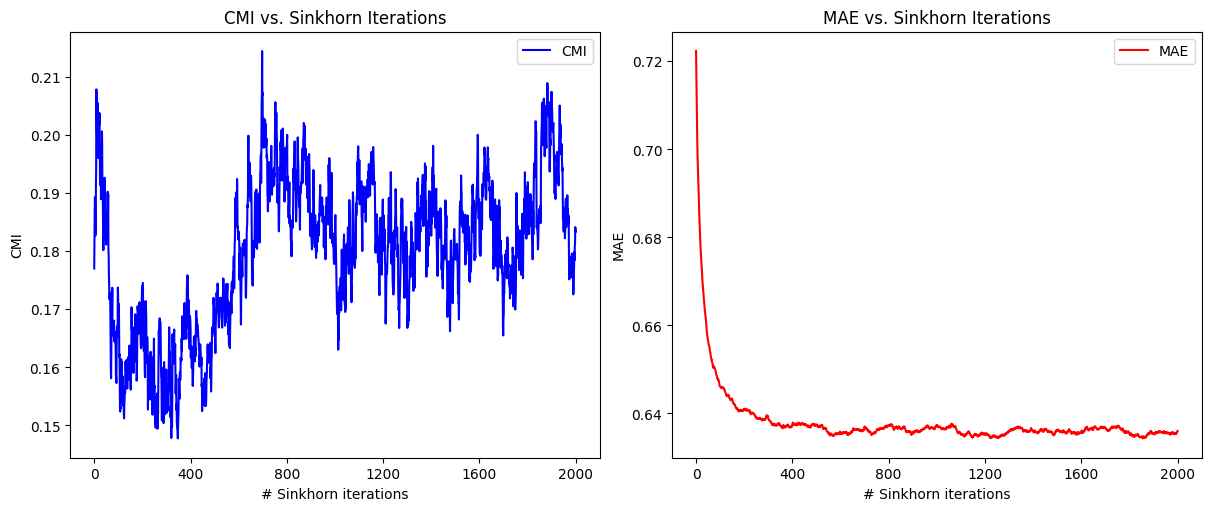

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss_mar25)  # Length of CMI data
npoints_mae = len(sk_maes25mar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss_mar25, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes25mar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()


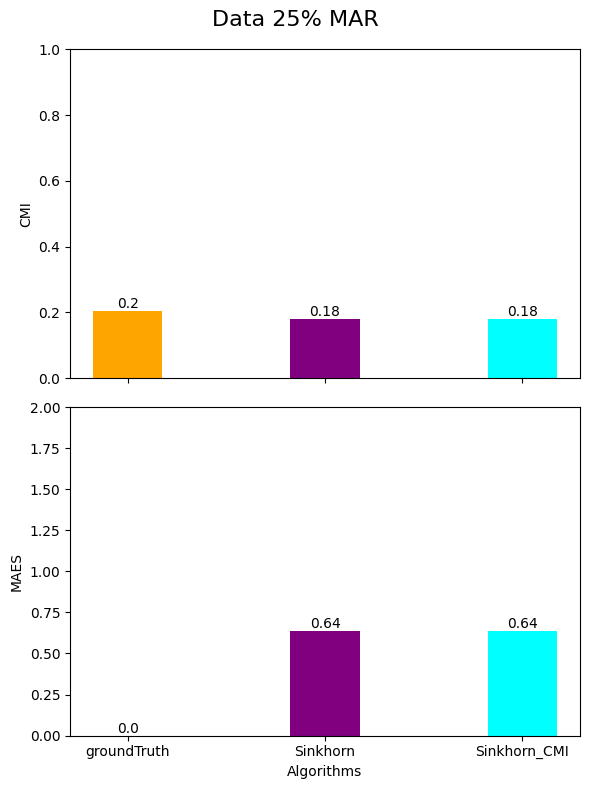

In [ ]:

# Define values and categories
values_cmi_mar25 = [cmi_groundTruth,on_cmi_missmar25,cmi_mar25]
values_maes_mar25 = [0.0,on_sk_mae_mar25.detach(),sk_mae_mar25.detach()]
categories = ["groundTruth","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange', 'purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mar25, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show() #display 


**25% MNAR**

In [34]:
dependencies_mnar25 = {
    "checking-account": {
        
        "condition": lambda row: True,
        "probability": lambda row: 0.5 if row["checking-account"] < 2 else 0.05
    },
    "duration": {
        
        "condition": lambda row: True,
        "probability": lambda row: 0.5 if row["duration"] <= 20 else 0.05
    },
    "savings-account": {
        
        "condition": lambda row: True,
        "probability": lambda row: 0.2 if row["savings-account"] != 0 else 0.1
    },
    "employment-since": {
        
         "condition": lambda row: True,
        "probability": lambda row: 0.2 if row["employment-since"] in [1,2] else 0.1
    },
    "credit-amount": {
        
         "condition": lambda row: True,
        "probability": lambda row: 0.25 if row["credit-amount"] > 5000 else 0.05
    },
    "job": {
        
         "condition": lambda row: True,
        "probability": lambda row: 0.25 if row["job"] < 2 else 0.05
    },

    "other-installment": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["other-installment"]==0 else 0.2 
    },

    "housing": {
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["housing"]==2 else 0.2 
    },

    "other-debtors": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["other-debtors"]==0 else 0.2 
    },

     "foreign-worker": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["foreign-worker"]==1 else 0.2 
    },
     "number-people-provide-maintenance-for": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["number-people-provide-maintenance-for"]==1 else 0.2 
    }



}


Generating MNAR 25%, and added the target coloumn with the 25% missing MNAR data

In [35]:
generator_mnar25 = Inject_Missing_Values()
miss_mnar25,index_mnar25 = generator_mnar25.MNAR(X,dependencies_mnar25,missing_rate=25)

miss_mnar25 = pd.concat([miss_mnar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mnar25 = miss_mnar25.isnull().sum().sum() / miss_mnar25.size * 100
print(f"Total Missing Percentage MNAR25: {total_missing_percentage_mnar25:.2f}%")

Total Missing Percentage MNAR25: 23.86%


In [36]:
missing_percentage = (miss_mnar25.isnull().sum() / len(miss_mnar25)) * 100
print(missing_percentage)

checking-account                         47.7
duration                                 49.6
credit-history                            0.0
purpose                                   0.0
credit-amount                            21.2
savings-account                          41.2
employment-since                         32.2
installment-rate                          0.0
other-debtors                            45.7
residence-since                           0.0
property                                  0.0
age                                       0.0
other-installment                        48.5
housing                                  48.0
existing-credits                          0.0
job                                      44.6
number-people-provide-maintenance-for    71.5
telephone                                 0.0
foreign-worker                           74.8
sex                                       0.0
marital-status                            0.0
class-label                       

In [37]:
miss_mnar25_numpy = scale(miss_mnar25) #z-score scaling
miss_mnar25_tensor = torch.tensor(miss_mnar25_numpy) #converting to tensor

Applying Sinkhorn algorithm to MNAR 25% data

In [38]:
#only Sinkhorn
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
print(epsilon_mnar25)
mask_mnar25= torch.isnan(miss_mnar25_tensor).double()


on_sk_imputer_mnar25 = SinkhornImputation(eps=epsilon_mnar25, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mnar25, on_sk_maes25mnar, on_sk_rmses25mnar = on_sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mnar25_numpy = on_sk_imp_mnar25.detach().cpu().numpy()
on_sk_mae_mnar25 = MAE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
on_sk_rmse_mnar25 = RMSE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print(on_sk_mae_mnar25, on_sk_rmse_mnar25)

INFO:root:batchsize = 128, epsilon = 0.7923
INFO:root:Iteration 0:	 Loss: 5.7076	 Validation MAE: 0.6668	RMSE: 0.9645


0.7923292030320952


INFO:root:Iteration 50:	 Loss: 5.3259	 Validation MAE: 0.6110	RMSE: 0.9483
INFO:root:Iteration 100:	 Loss: 5.3726	 Validation MAE: 0.6012	RMSE: 0.9435
INFO:root:Iteration 150:	 Loss: 5.6820	 Validation MAE: 0.5957	RMSE: 0.9397
INFO:root:Iteration 200:	 Loss: 5.7264	 Validation MAE: 0.5928	RMSE: 0.9363
INFO:root:Iteration 250:	 Loss: 6.0913	 Validation MAE: 0.5905	RMSE: 0.9339
INFO:root:Iteration 300:	 Loss: 5.2406	 Validation MAE: 0.5912	RMSE: 0.9335
INFO:root:Iteration 350:	 Loss: 5.5132	 Validation MAE: 0.5917	RMSE: 0.9332
INFO:root:Iteration 400:	 Loss: 6.2569	 Validation MAE: 0.5900	RMSE: 0.9316
INFO:root:Iteration 450:	 Loss: 5.6684	 Validation MAE: 0.5905	RMSE: 0.9326
INFO:root:Iteration 500:	 Loss: 5.5527	 Validation MAE: 0.5881	RMSE: 0.9304
INFO:root:Iteration 550:	 Loss: 5.7824	 Validation MAE: 0.5873	RMSE: 0.9297
INFO:root:Iteration 600:	 Loss: 5.2420	 Validation MAE: 0.5879	RMSE: 0.9307
INFO:root:Iteration 650:	 Loss: 5.5181	 Validation MAE: 0.5874	RMSE: 0.9306
INFO:root:Ite

tensor(0.5888, grad_fn=<DivBackward0>) tensor(0.9291, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn Imputation

In [39]:
#only CMI
on_cmi_missmnar25 = CMI.conditional_mutual_information(on_sk_imp_mnar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmnar25)
print(on_sk_mae_mnar25,on_sk_rmse_mnar25)

0.20288026192869105
tensor(0.5888, grad_fn=<DivBackward0>) tensor(0.9291, grad_fn=<SqrtBackward0>)


Applying Sinkhorn-CMI algorithm to MNAR 25% data

In [40]:
#sinkhorn_CMI
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mnar25)
mask_mnar25 = torch.isnan(miss_mnar25_tensor).double()


sk_imputer_mnar25 = SinkhornImputation_CMI(eps = epsilon_mnar25, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mnar25, sk_maes25mnar, sk_rmses25mnar,cmi_loss_mnar25, sinkhorn_loss_mnar25 = sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mnar25_numpy = sk_imp_mnar25.detach().cpu().numpy()

sk_mae_mnar25 = MAE(sk_imp_mnar25, groundTruth_tensor , mask_mnar25)
sk_rmse_mnar25 = RMSE(sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print(sk_mae_mnar25, sk_rmse_mnar25)





0.7923292030320952


INFO:root:Iteration 0:	 Loss: 5.2041	 Validation MAE: 0.6684	RMSE: 0.9684
INFO:root:Iteration 50:	 Loss: 49.2932	 Validation MAE: 0.6118	RMSE: 0.9492
INFO:root:Iteration 100:	 Loss: 49.5280	 Validation MAE: 0.6010	RMSE: 0.9431
INFO:root:Iteration 150:	 Loss: 51.3463	 Validation MAE: 0.5981	RMSE: 0.9407
INFO:root:Iteration 200:	 Loss: 47.7649	 Validation MAE: 0.5941	RMSE: 0.9370
INFO:root:Iteration 250:	 Loss: 47.7063	 Validation MAE: 0.5923	RMSE: 0.9357
INFO:root:Iteration 300:	 Loss: 46.7237	 Validation MAE: 0.5913	RMSE: 0.9347
INFO:root:Iteration 350:	 Loss: 49.0955	 Validation MAE: 0.5910	RMSE: 0.9341
INFO:root:Iteration 400:	 Loss: 48.5235	 Validation MAE: 0.5898	RMSE: 0.9334
INFO:root:Iteration 450:	 Loss: 46.8352	 Validation MAE: 0.5903	RMSE: 0.9337
INFO:root:Iteration 500:	 Loss: 47.3934	 Validation MAE: 0.5886	RMSE: 0.9324
INFO:root:Iteration 550:	 Loss: 48.3298	 Validation MAE: 0.5884	RMSE: 0.9313
INFO:root:Iteration 600:	 Loss: 45.5751	 Validation MAE: 0.5872	RMSE: 0.9308
INF

tensor(0.5890, grad_fn=<DivBackward0>) tensor(0.9288, grad_fn=<SqrtBackward0>)


CMI for Sinkhorn_CMI Imputation

In [41]:
#CMI
cmi_mnar25 = CMI.conditional_mutual_information(sk_imp_mnar25, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mnar25)
print(sk_mae_mnar25,sk_rmse_mnar25)

0.21279227874799675
tensor(0.5890, grad_fn=<DivBackward0>) tensor(0.9288, grad_fn=<SqrtBackward0>)


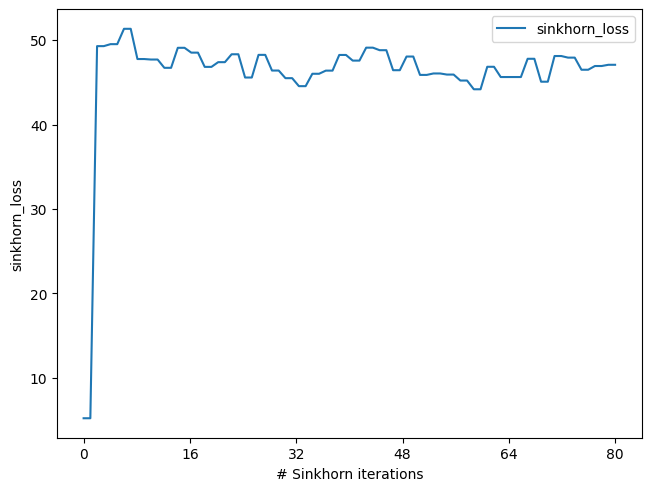

In [42]:
sinkhorn_loss_mnar25 = torch.tensor(sinkhorn_loss_mnar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mnar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mnar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

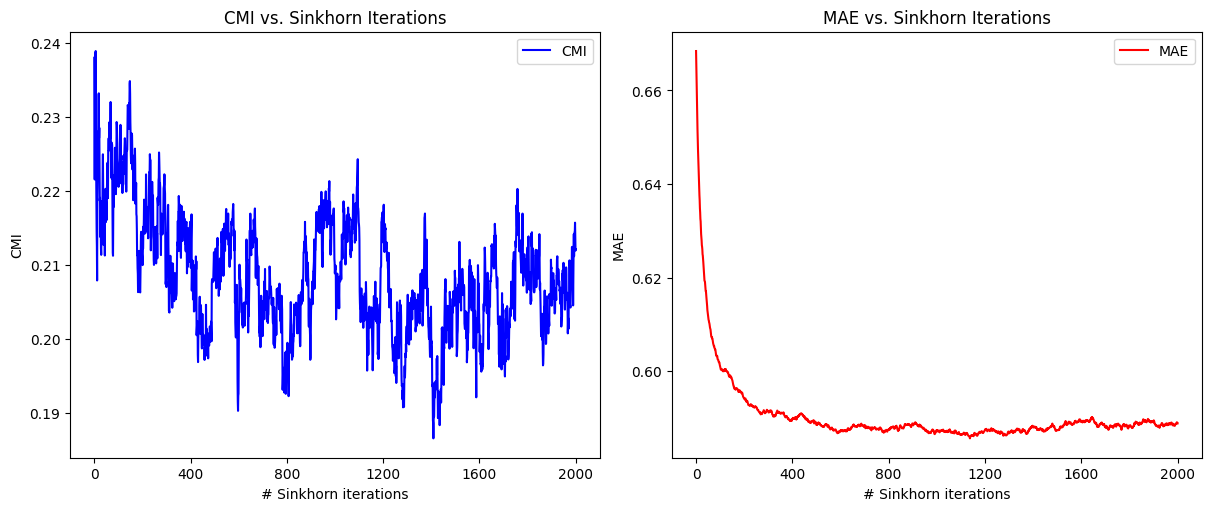

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss_mnar25)  # Length of CMI data
npoints_mae = len(sk_maes25mnar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss_mnar25, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes25mnar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()


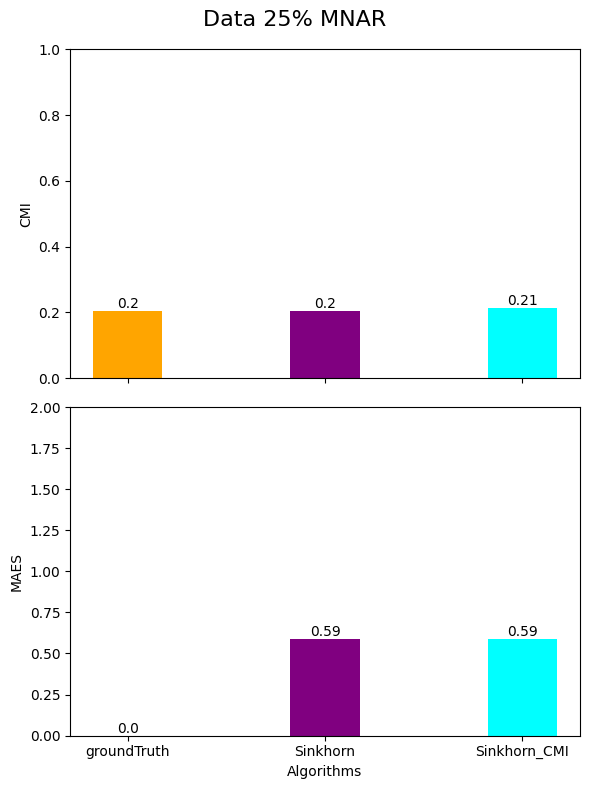

In [44]:

# Define values and categories
values_cmi_mnar25 = [cmi_groundTruth,on_cmi_missmnar25,cmi_mnar25]
values_maes_mnar25 = [0.0,on_sk_mae_mnar25.detach(),sk_mae_mnar25.detach()]
categories = ["groundTruth","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange', 'purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MNAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mnar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAES bars and add values on top
bars2 = ax2.bar(index, values_maes_mnar25, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()
